# Theory

The onedimensional Schrödinger Equation with a time independent Potential is:  
$i\hbar\frac{\partial\Psi(x,t)}{\partial t}=-\frac{\hbar^2}{2m}\frac{\partial^2\Psi(x,t)}{\partial x^2}+V(x)\Psi(x,t)$  
Using seperation of variables $\Psi(x,t)=\psi(x)\phi(t)$ we derive the following differential Equations:  
$\frac{d\phi}{dt}=-\frac{iE}{\hbar}\phi\rightarrow\phi(t)=e^{-\frac{iE}{\hbar}t}$  
and  
$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi=E\psi$ or $\hat{H}\psi=E\psi$  
This program is going to solve the Eigenproblem of the time independent Schrödinger Equation numerically and in the end, multiply the time dependent part to get $\Psi(x,t)$. 

## Deriving the numerical solution

The first approximation to make is, that the Wave function is bounded in the region from $x=0$ to $x=L$, meaning $\psi(0)=\psi(L)=0$. This requirement is basically enforcing that the wave function stays normalizable, and for sufficiently large $L$, the wave function is approximately unbounded in between.  
To make things easier, we are going to introduce a dimensionless variable $\xi=\frac{x}{L}$. The boundary conditions become $\psi(0)=\psi(1)=0$ and the time independent Schrödinger Equation becomes $-\frac{\hbar^2}{2mL^2}\frac{d^2\psi}{d\xi^2}+V(\xi)\psi=E\psi$. (If you want you can rename it back to $x$ since that is the name I will use in the code.)  
The next approximation necessary is the discretization of the $\xi$ axis into $N$ intervalls of distance $\Delta\xi$. Since the wave function only exists between $\xi=0$ and $\xi=1$ we get $N\Delta\xi=1$

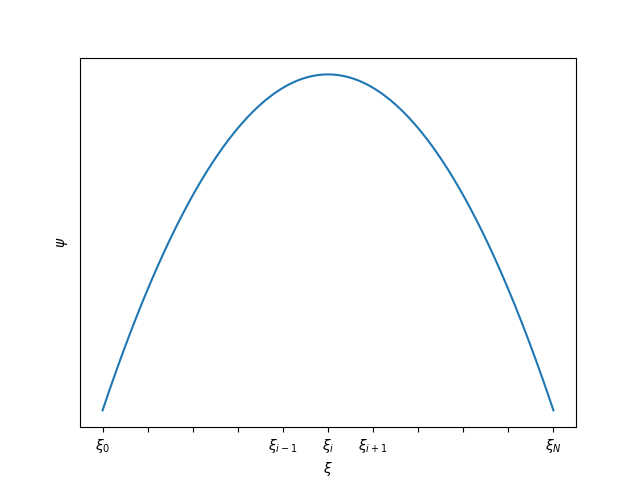

We are now approximating $\psi(\xi_i+\Delta\xi)$ and $\psi(\xi_i-\Delta\xi)$ as a Taylor series of degree 2 at $\xi_i$.  
$\psi(\xi_i+\Delta\xi)=\psi(\xi_i)+\frac{d\psi}{d\xi}|_{\xi=\xi_i}\Delta\xi+\frac12\frac{d^2\psi}{d\xi^2}|_{\xi=\xi_i}(\Delta\xi)^2$  
$\psi(\xi_i-\Delta\xi)=\psi(\xi_i)-\frac{d\psi}{d\xi}|_{\xi=\xi_i}\Delta\xi+\frac12\frac{d^2\psi}{d\xi^2}|_{\xi=\xi_i}(-\Delta\xi)^2$
Adding these two equations together we end up with  
$\frac{d^2\psi}{d\xi^2}|_{\xi=\xi_i}=\frac{\psi_{i-1}-2\psi_i+\psi_{i+1}}{(\Delta\xi)^2}$ with $\psi_i=\psi(\xi_i)$  
Substituting back into the time independent Schrödinger Equation:  
$-\frac{\hbar^2}{2(\Delta\xi)^2}\psi_{i-1}+(\frac{\hbar^2}{(\Delta\xi)^2}+mL^2V_i)\psi_i-\frac{\hbar^2}{2(\Delta\xi)^2}\psi_{i+1}=mL^2E\psi_i$  
This Eigenproblem written in matrix form is  
$\left(\begin{array}{cccc}\frac{\hbar^2}{(\Delta\xi)^2}+mL^2V_1 & -\frac{\hbar^2}{2(\Delta\xi)^2} &  & 0 \\ -\frac{\hbar^2}{2(\Delta\xi)^2} & \frac{\hbar^2}{(\Delta\xi)^2}+mL^2V_2 & -\frac{\hbar^2}{2(\Delta\xi)^2} &  \\  &  & \ddots & -\frac{\hbar^2}{2(\Delta\xi)^2} \\ 0 &  & -\frac{\hbar^2}{2(\Delta\xi)^2} & \frac{\hbar^2}{(\Delta\xi)^2}+mL^2V_{N-1} \end{array}\right)\left(\begin{array}{c}\psi_1 \\ \psi_2 \\ \\ \vdots \\  \\ \psi_{N-1}\end{array}\right)=mL^2E\left(\begin{array}{c}\psi_1 \\ \psi_2 \\ \\ \vdots \\  \\ \psi_{N-1}\end{array}\right)$

This Eigenproblem has the form of a tridiagonal matrix, which can be solved in python using the eigh_tridiagonal method of the scipy library.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy import constants

In [3]:
N = 10000 #number of intervalls. The higher N the better the numerical solution


dx = 1/N
x = np.linspace(0,1,N+1)
x = x[1:-1]
hbar=1
pi = constants.pi
m=1
L = 1000
K=hbar**2/(2*dx**2)

In [4]:
def V(x, m, L):
    return m*L**2*((x-0.5)**2)  #choose potential in the bracket after m*L**2

In [5]:
def calc_Eig(N):
    md = 2*K+V(x, m, L) #main diagonal
    od = -K*np.ones(len(md)-1) #off diagonal
    E, psi = eigh_tridiagonal(md, od)
    psi=psi.T
    E = E/(m*L**2)
    return E, psi

In [6]:
def show_E(E):
    plt.plot(range(len(E)), E, 'b,')
    plt.show()

In [7]:
def show_psi(psi, E, n):
    plt.plot(x, V(x,m,L)/(m*L**2), color= 'black')
    for i in n:
        plt.plot(x, psi[i]+E[i])
    plt.show()

In [8]:
E, psi = calc_Eig(N)

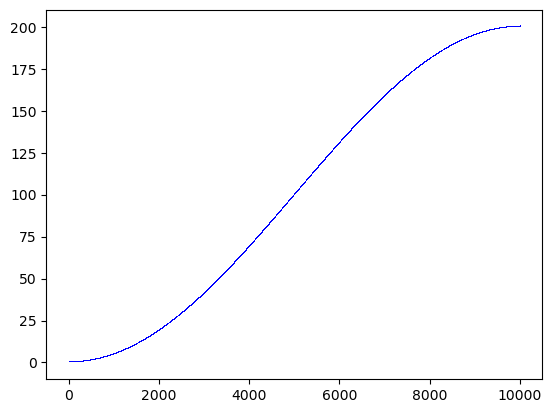

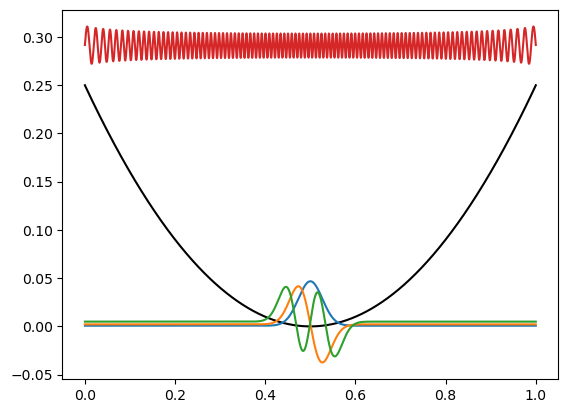

In [9]:
show_E(E)
show_psi(psi,E, [0,1,3,200])

In [10]:
from matplotlib.animation import FuncAnimation
from IPython import display
from functools import partial

In [11]:
def show_anim(i):
    fig = plt.figure()

    lines = plt.plot([])
    line = lines[0]
    print(line)
    #setup
    plt.xlim(0,1)
    plt.ylim(-1.2*max(psi[i]),1.2*max(psi[i]))
    
    anim = FuncAnimation(fig, partial(animate, psinr=i, plot=line), frames = 100, interval = 20)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

In [12]:


#plt.plot(x, V(x,m,L)/(m*L**2))

def animate(frame, psinr, plot):
    y = psi[psinr]*np.real(constants.e**(-complex(0,1)*frame/(100*2*pi)))
    plot.set_data((x, y))




In [13]:
show_anim(1)

Line2D(_child0)


Appendix to generate image for describtion in the beginning.

In [41]:
def Image(save):
    x = np.linspace(0,1,1001)
    y = x*(1-x)
    plt.xlabel(r"$\xi$")
    plt.ylabel(r"$\psi$")
    plt.xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], [r"$\xi_0$", "", "", "", r"$\xi_{i-1}$", r"$\xi_i$", r"$\xi_{i+1}$", "", "", "", r"$\xi_N$"])
    plt.yticks([])
    plt.plot(x, y)
    if save:
        plt.savefig(r'C:\Users\User\Downloads\discretization.png')

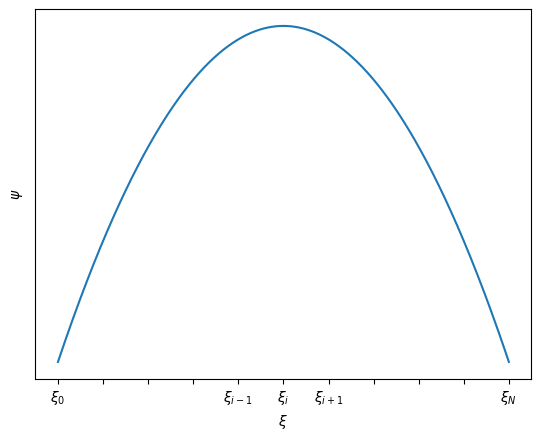

In [42]:
Image(True)